In [35]:
from __future__ import print_function
import numpy as np 

In [36]:
def acc(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    print(correct)
    print(y_true.shape)
    print(y_true.shape[0])
    return float(correct)/y_true.shape[0]

y_true = np.array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2])
y_pred = np.array([0, 1, 0, 2, 1, 1, 0, 2, 1, 2])

print('accuracy = ', acc(y_true, y_pred))

6
(10,)
10
accuracy =  0.6


In [37]:
#  tính bằng thư viện
from sklearn.metrics import accuracy_score
print('accuracy =', accuracy_score(y_true, y_pred))
print(np.sum(y_true == y_pred), '# dung ham numpy.sum()')
sum = 0
for i in range(len(y_pred)):
    if y_true[i] == y_pred[i]:
        sum += 1
print(sum, '# creat function')
               

accuracy = 0.6
6 # dung ham numpy.sum()
6 # creat function


In [38]:
# confusion_matrix, unnormalized confusion matrix, ma tran chua chuan hoa
def my_confusion_matrix(y_true, y_pred):
    N = np.unique(y_true).shape[0] # number of classes, tao ma tran cm co so chieu NxN
    cm = np.zeros((N, N))
    print(np.unique(y_true))
    print(np.unique(y_true).shape)
    print(N,'\n', cm, '\n', y_true,'\n', y_pred, '\n', y_true.shape[0])
    for n in range(y_true.shape[0]):
        cm[y_true[n], y_pred[n]] += 1
    return cm
cnf_matrix = my_confusion_matrix(y_true, y_pred)
print('\nConfusion matrix:')
print(cnf_matrix)
print('\nAccuracy:', np.diagonal(cnf_matrix).sum()/cnf_matrix.sum())

[0 1 2]
(3,)
3 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 
 [0 0 0 0 1 1 1 2 2 2] 
 [0 1 0 2 1 1 0 2 1 2] 
 10

Confusion matrix:
[[2. 1. 1.]
 [1. 2. 0.]
 [0. 1. 2.]]

Accuracy: 0.6


In [39]:
# normalized confusion matrix, ma tran confusion chuan hoa
# lấy mỗi hàng của unnormalized confusion matrix sẽ được chia cho tổng các phần tử trên hàng đó
# nhận xét rằng tổng các phần tử trên một hàng của normalized confusion matrix luôn bằng 1. 
# Điều này thường không đúng trên mỗi cột

# import pandas as pd
# x = np.matrix([[1,2], [3,4]])
# print(x)
# x.sum()
# x.sum(axis=0)
# df = pd.DataFrame([[1, 2, np.nan],
#                    [np.nan, 3, 5],
#                    [2, 4, 6]])

# df.dropna(axis=0) 
# #df.dropna(axis=1) 

normalized_confusion_matrix = cnf_matrix/cnf_matrix.sum(axis=1, keepdims=True)
print('\nConfusion matrix (with normalizatrion:)')
print(normalized_confusion_matrix)


Confusion matrix (with normalizatrion:)
[[0.5  0.25 0.25]
 [0.33 0.67 0.  ]
 [0.   0.33 0.67]]


ValueError: Unknown format code 'd' for object of type 'float'

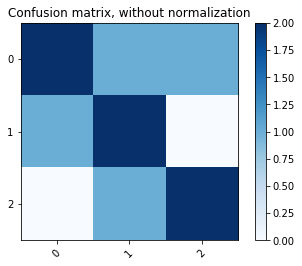

In [40]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = [0, 1, 2]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


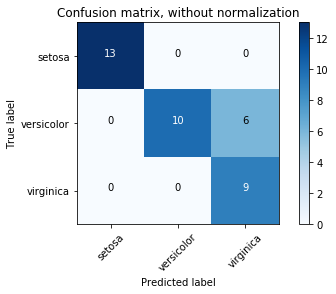

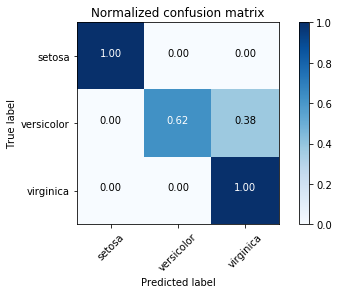

In [34]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()